In [1]:
#import the dependencies and load the dataset
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
(X_train,y_train),(x_test,y_test)=mnist.load_data()
X_train.shape,y_train.shape,x_test.shape,y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

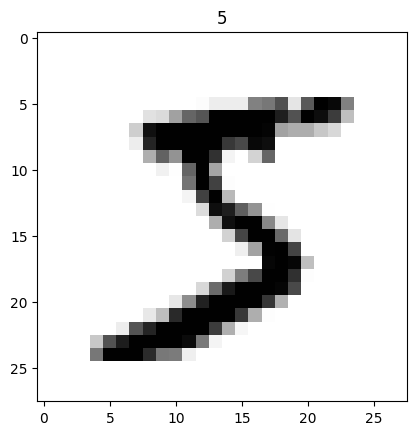

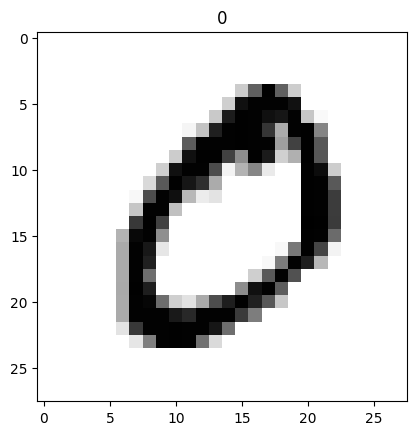

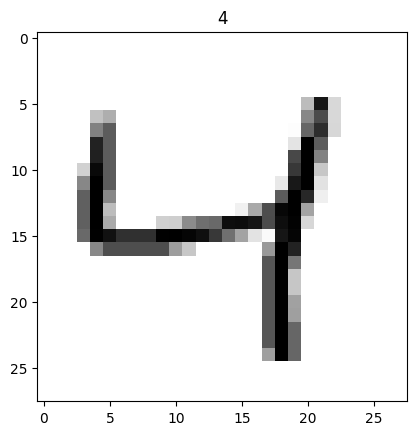

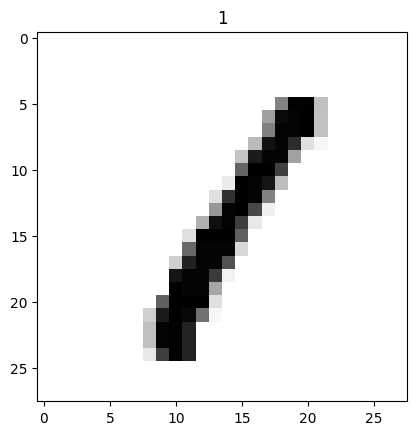

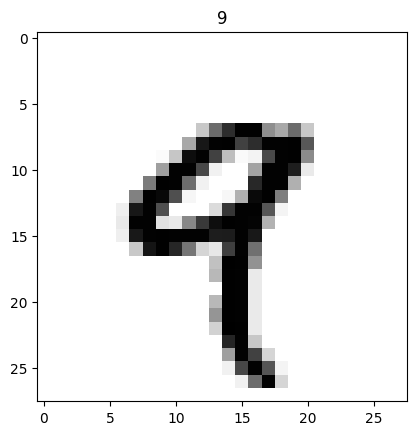

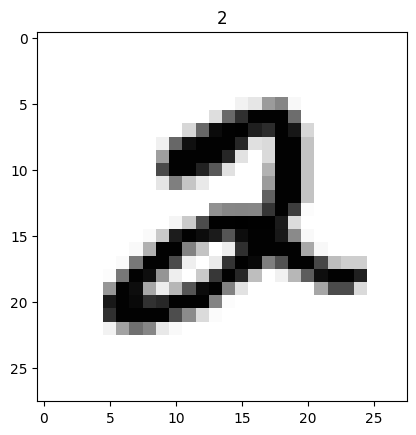

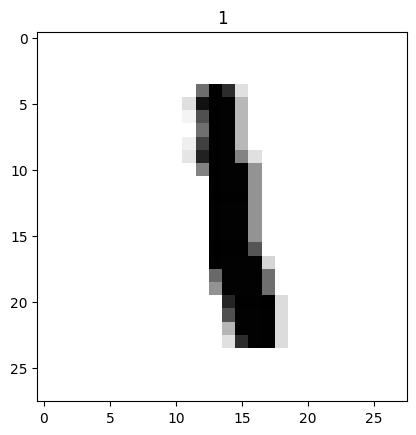

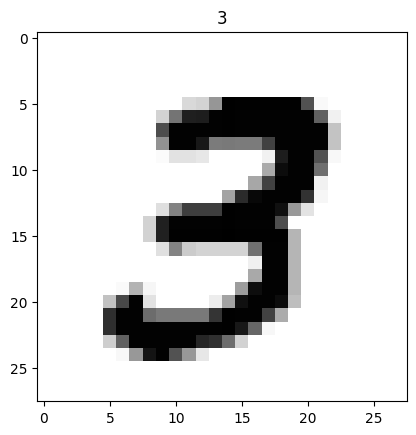

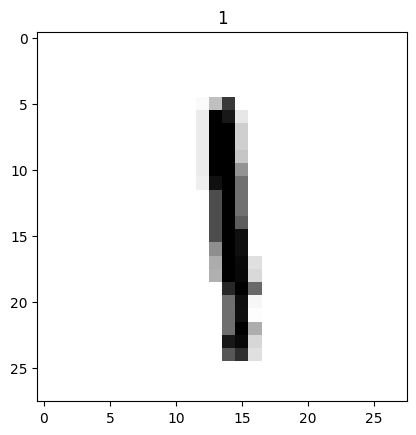

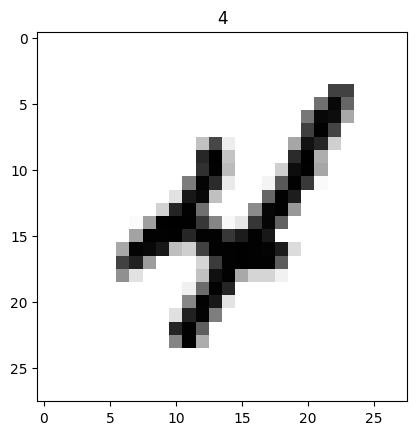

In [3]:
def plot_input_img(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()
for i in range(10):
    plot_input_img(i)

In [4]:
#pre process the images

#normalizing the image to [0,1] range
X_train = X_train.astype (np.float32)/255
X_test = x_test.astype (np.float32)/255

# reshape / expand the dimentions of images to (28,28,1)
X_train = np.expand_dims (X_train, -1)
X_test = np.expand_dims (X_test, -1)

#convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
#build the CNN model to classify handwritten digits
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation= 'relu') )
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout (0.25))

model.add(Dense(10, activation="softmax"))

In [6]:
#summary of the training model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [7]:
#compile the model using keras.optimizers.Adam
model.compile(optimizer= 'adam', loss = keras.losses.categorical_crossentropy , metrics=['accuracy'])

In [8]:
#callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#earlystopping
es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)

#model checkpoint
mc = ModelCheckpoint("./bestmodel.h5", monitor= "val_acc", verbose= 1, save_best_only= True)

cb= [es,mc]

In [9]:
#train the model
his = model.fit(X_train, y_train, epochs=5, validation_split=0.3, callbacks=cb)

Epoch 1/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.2192 - accuracy: 0.9342

1313/1313 [==============================] - 39s 29ms/step - loss: 0.2192 - accuracy: 0.9342 - val_loss: 0.0884 - val_accuracy: 0.9737
Epoch 2/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0733 - accuracy: 0.9775

1313/1313 [==============================] - 53s 40ms/step - loss: 0.0733 - accuracy: 0.9775 - val_loss: 0.0587 - val_accuracy: 0.9816
Epoch 3/5
1311/1313 [============================>.] - ETA: 0s - loss: 0.0546 - accuracy: 0.9830

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0545 - accuracy: 0.9830 - val_loss: 0.0463 - val_accuracy: 0.9856
Epoch 4/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0447 - accuracy: 0.9866

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0447 - accuracy: 0.9866 - val_loss: 0.0449 - val_accuracy: 0.9863
Epoch 5/5
1312/1313 [============================>.] - ETA: 0s - loss: 0.0377 - accuracy: 0.9874

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0377 - accuracy: 0.9874 - val_loss: 0.0426 - val_accuracy: 0.9878


In [10]:
loss = his.history['loss']
accuracy = his.history['accuracy']
val_loss = his.history['val_loss']
val_accuracy = his.history['val_accuracy']

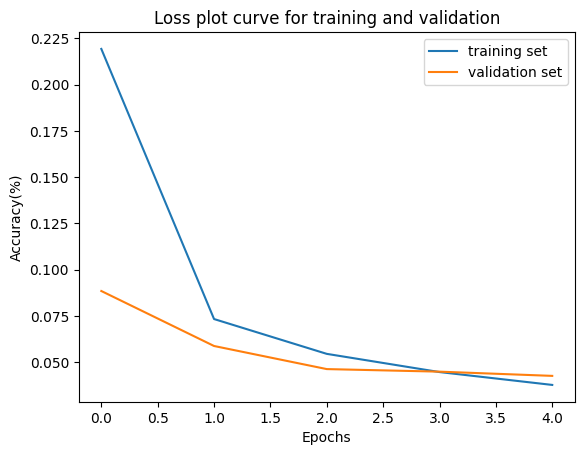

In [11]:
#model evaluation

#loss plot curve for training and validation
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.plot(loss, label='training set')
plt.plot(val_loss, label='validation set')
plt.title("Loss plot curve for training and validation")
plt.legend()

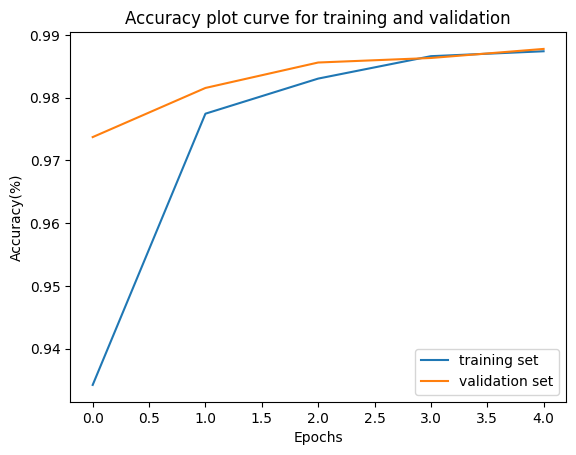

In [12]:
#accuracy plot curve for training and validation
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.plot(accuracy, label='training set')
plt.plot(val_accuracy, label='validation set')
plt.title("Accuracy plot curve for training and validation")
plt.legend()

In [13]:
#get the training loss and accuracy from the his object
train_loss = his.history['loss']
train_accuracy = his.history['accuracy']

#calculate the average training loss and accuracy
avg_train_loss = sum(train_loss) / len(train_loss)
avg_train_accuracy = sum(train_accuracy) / len(train_accuracy)

print("Train loss:", avg_train_loss)
print("Train accuracy:", avg_train_accuracy)

Train loss: 0.08588065579533577
Train accuracy: 0.9737476229667663


In [14]:
#get the validation loss and accuracy from the his object
val_loss = his.history['val_loss']
val_accuracy = his.history['val_accuracy']

#calculate the average validation loss and accuracy
avg_val_loss = sum(val_loss) / len(val_loss)
avg_val_accuracy = sum(val_accuracy) / len(val_accuracy)

print("Validation loss:", avg_val_loss)
print("Validation accuracy:", avg_val_accuracy)

Validation loss: 0.056188343465328215
Validation accuracy: 0.9830000042915344


In [15]:
#save and load the model
model_name = 'bestmodel.keras'
model.save(model_name, save_format='h5')
loaded_model = tf.keras.models.load_model(model_name)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
#visualise validation predicted data on how the digits were written
predictions_one_hot = loaded_model.predict([X_test])

313/313 [==============================] - 2s 6ms/step


In [17]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [18]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.280847e-10,3.242100e-10,5.685831e-07,3.525115e-06,3.231836e-12,2.295330e-10,4.496117e-16,9.999951e-01,1.001264e-08,7.223619e-07
1,5.519106e-06,1.738158e-06,9.999841e-01,1.256796e-09,1.936006e-10,2.233468e-12,4.635690e-06,3.711964e-11,3.974114e-06,1.001588e-11
2,3.330684e-08,9.995570e-01,8.269663e-06,1.041763e-07,3.316329e-04,2.018966e-06,5.069071e-06,7.815576e-05,1.708361e-05,6.351879e-07
3,9.998897e-01,5.083478e-12,1.338658e-05,1.548272e-08,5.348145e-07,2.351518e-07,8.203544e-05,2.025245e-07,6.736012e-06,7.102159e-06
4,2.755710e-09,2.054716e-10,1.363640e-08,3.983473e-09,9.998477e-01,3.849595e-10,1.302173e-08,1.884446e-07,2.030857e-08,1.520241e-04
...,...,...,...,...,...,...,...,...,...,...
9995,6.474658e-13,1.138522e-07,9.999997e-01,1.944524e-09,4.712526e-15,8.090181e-17,1.040200e-15,4.804664e-08,1.160392e-07,5.910654e-14
9996,7.981358e-09,5.622209e-09,1.233404e-06,9.999971e-01,1.492468e-12,1.254759e-06,7.179659e-14,5.167520e-10,1.438308e-07,2.662571e-07
9997,5.523849e-13,3.593844e-11,4.442681e-12,9.560302e-12,9.999998e-01,5.185926e-11,7.986747e-11,1.658896e-09,9.886985e-08,3.508329e-08
9998,3.044746e-06,7.338689e-11,7.999730e-09,7.009460e-04,1.581823e-08,9.536807e-01,1.478772e-04,1.502755e-09,4.546717e-02,1.430199e-07


In [19]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


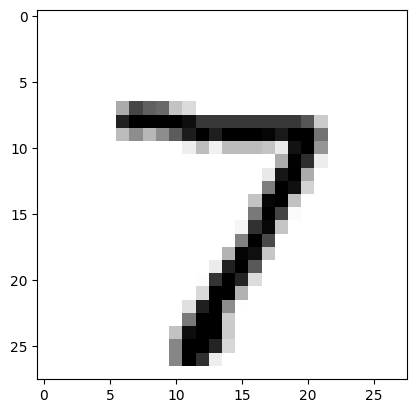

In [20]:
plt.imshow(x_test[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()

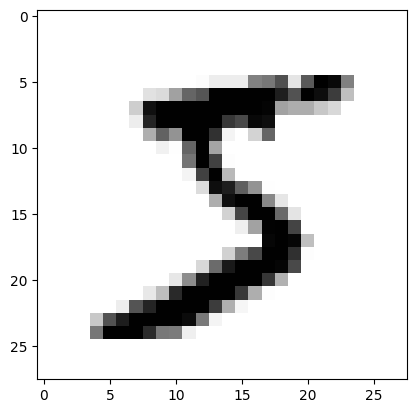

In [21]:
plt.imshow(X_train[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [22]:
#model prediction on unseen dataset(test data)
predictions_one_hot = loaded_model.predict([x_test])
print('predictions_one_hot:', predictions_one_hot.shape)

313/313 [==============================] - 2s 6ms/step
predictions_one_hot: (10000, 10)


In [23]:
#predicted probabilities of all digits
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
